In [2]:
import sys
import os 
import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.mgxs as mgxs
import pandas as pd
from IPython.display import Image
import glob
import re

### Import Output datas

In [12]:
def load_mgxs(sp_file_path,sm_file_path,model_file_path,pb_num):

    sm=openmc.Summary(sm_file_path)
    sp = openmc.StatePoint(sp_file_path)
    sp.link_with_summary(sm)
    model=openmc.model.Model
    model=openmc.model.Model.from_model_xml(model_file_path)
    mgxs_lib = openmc.mgxs.Library(model.geometry)
    groups = openmc.mgxs.EnergyGroups(openmc.mgxs.GROUP_STRUCTURES['XMAS-172'])
    mgxs_lib.energy_groups = groups
    mgxs_lib.scatter_format = "legendre"
    mgxs_lib.legendre_order = 7
    mgxs_lib.mgxs_types = ['total', 'absorption', 'fission', 'nu-fission', 'chi', 'scatter matrix', 'nu-scatter matrix', 'inverse-velocity']
    mgxs_lib.by_nuclide = False
    mgxs_lib.domain_type = 'cell'
    
    if pb_num=='36' or pb_num=='72':
        pattern = r"[a-zA-Z]+_(\d{1,2})_(\d{1,2})"
        def check_numbers(string):
            match = re.match(pattern, string)
            if match:
                n1, n2 = match.groups()
                n1, n2 = int(n1), int(n2)
                return 0 <= n1 <= 8 and 0 <= n2 <= 8
            return False
        cell_in_quarter=[]    
        for cell in model.geometry.get_all_material_cells().values():
            if check_numbers(cell.name)==True:
                cell_in_quarter.append(cell)         
        mgxs_lib.domains = cell_in_quarter
    else:
        mgxs_lib.domains = model.geometry.get_all_material_cells().values() 
        
    all_cell_order=[]
    for cell in (mgxs_lib.domains):
        all_cell_order.append(cell.name)
    print(all_cell_order)
    mgxs_lib_plot=mgxs_lib
    mgxs_lib.build_library()
    mgxs_lib.load_from_statepoint(sp)
    return(mgxs_lib,all_cell_order,mgxs_lib_plot)

In [21]:
sp_1family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/1family/sp_1.h5'
sm_1family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/1family/sm_1.h5'
model_1family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/1family/model_1.xml'
import_1=load_mgxs(sp_1family_path,sm_1family_path,model_1family_path,'1')
mgxs_lib_1family=import_1[0]
cell_in_order_1=import_1[1]
lib_plot_1=import_1[2]
mgxs_lib_1family = mgxs_lib_1family.create_mg_library(xs_type='macro', xsdata_names=cell_in_order_1)
# mgxs_lib_1family.xsdatas[0].temperatures=[565.]
# mgxs_lib_1family.xsdatas[1].temperatures=[565.]
# mgxs_lib_1family.xsdatas[2].temperatures=[565.]
mgxs_lib_1family.export_to_hdf5('mgxs_1family.h5')


/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=7.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=8.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=9.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=51.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=52.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=53.
  warn(msg, IDWarning)
/opt

['fuel_pincell', 'clad_pincell', 'moderator_pincell', 'water_guide', 'clad_guide', 'moderator_guide', 'water_instru', 'clad_instru', 'moderator_instru', 'water_outside']


/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mgxs_library.py:1644: RuntimeWarning: invalid value encountered in divide
  self._multiplicity_matrix[i] = np.divide(nuscatt, scatt)


In [14]:
sp_6family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/6family/sp_6.h5'
sm_6family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/6family/sm_6.h5'
model_6family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/6family/model_6.xml'
import_6=load_mgxs(sp_6family_path,sm_6family_path,model_6family_path,'6' )
mgxs_lib_6family=import_6[0]
cell_in_order_6=import_6[1]
lib_plot_6=import_6[2]
print(cell_in_order_6)
mgxs_lib_6family = mgxs_lib_6family.create_mg_library(xs_type='macro', xsdata_names=cell_in_order_6)
# mgxs_lib_1family.xsdatas[0].temperatures=[565.]
# mgxs_lib_1family.xsdatas[1].temperatures=[565.]
# mgxs_lib_1family.xsdatas[2].temperatures=[565.]
# mgxs_lib_6family.export_to_hdf5('mgxs_6family.h5')

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=7.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=8.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=9.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=121.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=122.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=123.
  warn(msg, IDWarning)
/

['fuel_C', 'clad_C', 'moderator_C', 'fuel_E', 'clad_E', 'moderator_E', 'fuel_N', 'clad_N', 'moderator_N', 'fuel_D', 'clad_D', 'moderator_D', 'fuel_F', 'clad_F', 'moderator_F', 'fuel_FD', 'clad_FD', 'moderator_FD', 'water_GT', 'clad_GT', 'moderator_GT', 'water_IT', 'clad_IT', 'moderator_IT', 'water_outside']
['fuel_C', 'clad_C', 'moderator_C', 'fuel_E', 'clad_E', 'moderator_E', 'fuel_N', 'clad_N', 'moderator_N', 'fuel_D', 'clad_D', 'moderator_D', 'fuel_F', 'clad_F', 'moderator_F', 'fuel_FD', 'clad_FD', 'moderator_FD', 'water_GT', 'clad_GT', 'moderator_GT', 'water_IT', 'clad_IT', 'moderator_IT', 'water_outside']


/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mgxs_library.py:1644: RuntimeWarning: invalid value encountered in divide
  self._multiplicity_matrix[i] = np.divide(nuscatt, scatt)


In [3]:
sp_36family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/36family/sp_36.h5'
sm_36family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/36family/sm_36.h5'
model_36family_path='/Users/pablogarcia44/repo/Garcia_OpenSn/assembly_study/5-family/36family/model_36_test.xml'
import_36=load_mgxs(sp_36family_path,sm_36family_path,model_36family_path,'36' )
mgxs_lib_36family=import_36[0]
cell_in_order_36=import_36[1]
mgxs_lib_36family = mgxs_lib_36family.create_mg_library(xs_type='macro', xsdata_names=cell_in_order_36)
# mgxs_lib_1family.xsdatas[0].temperatures=[565.]
# mgxs_lib_1family.xsdatas[1].temperatures=[565.]
# mgxs_lib_1family.xsdatas[2].temperatures=[565.]
mgxs_lib_36family.export_to_hdf5('mgxs_36family_test.h5')

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=9.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=10.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=11.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=12.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=4009.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=4010.
  warn(msg, IDWarnin

['fuel_0_0', 'gap_0_0', 'clad_0_0', 'moderator_0_0', 'fuel_1_0', 'gap_1_0', 'clad_1_0', 'moderator_1_0', 'fuel_2_0', 'gap_2_0', 'clad_2_0', 'moderator_2_0', 'fuel_3_0', 'gap_3_0', 'clad_3_0', 'moderator_3_0', 'fuel_4_0', 'gap_4_0', 'clad_4_0', 'moderator_4_0', 'fuel_5_0', 'gap_5_0', 'clad_5_0', 'moderator_5_0', 'fuel_6_0', 'gap_6_0', 'clad_6_0', 'moderator_6_0', 'fuel_7_0', 'gap_7_0', 'clad_7_0', 'moderator_7_0', 'fuel_8_0', 'gap_8_0', 'clad_8_0', 'moderator_8_0', 'fuel_1_1', 'gap_1_1', 'clad_1_1', 'moderator_1_1', 'fuel_2_1', 'gap_2_1', 'clad_2_1', 'moderator_2_1', 'fuel_3_1', 'gap_3_1', 'clad_3_1', 'moderator_3_1', 'fuel_4_1', 'gap_4_1', 'clad_4_1', 'moderator_4_1', 'fuel_5_1', 'gap_5_1', 'clad_5_1', 'moderator_5_1', 'fuel_6_1', 'gap_6_1', 'clad_6_1', 'moderator_6_1', 'fuel_7_1', 'gap_7_1', 'clad_7_1', 'moderator_7_1', 'fuel_8_1', 'gap_8_1', 'clad_8_1', 'moderator_8_1', 'fuel_2_2', 'gap_2_2', 'clad_2_2', 'moderator_2_2', 'fuel_3_2', 'gap_3_2', 'clad_3_2', 'moderator_3_2', 'fuel_4_2',

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mgxs_library.py:1644: RuntimeWarning: invalid value encountered in divide
  self._multiplicity_matrix[i] = np.divide(nuscatt, scatt)


In [29]:
def cell_domain(cell,mgxs_lib):
    # print(type(mgxs_lib))
    for k in range(len(mgxs_lib.domains)):
        if mgxs_lib.domains[k].name==cell:
            return(mgxs_lib.domains[k].id)

In [30]:
def mgxs_value(cell,reaction,mgxs_lib):  
    cell_name=cell
    cell=cell_domain(cell_name,mgxs_lib)
    mgxs_plot = mgxs_lib.get_mgxs(cell,reaction)
    mgxs=mgxs_plot.get_pandas_dataframe(xs_type='macro')['mean'].values
    return(mgxs)

In [31]:
def rd_max(mgxs1,mgxs2):   
    avg=0
    index=0
    rd_max=0
    for i in range (171):
        rd1=0
        rd2=0
        if mgxs1[i]!=0:
            rd1=abs(mgxs1[i]-mgxs2[i])/mgxs1[i]
        if mgxs2[i]!=0:
            rd2=abs(mgxs1[i]-mgxs2[i])/mgxs2[i]
        if rd1>rd_max or rd1>rd_max:
            rd_max=max(rd1,rd2)
            index=i
    return(100*rd_max,index) 

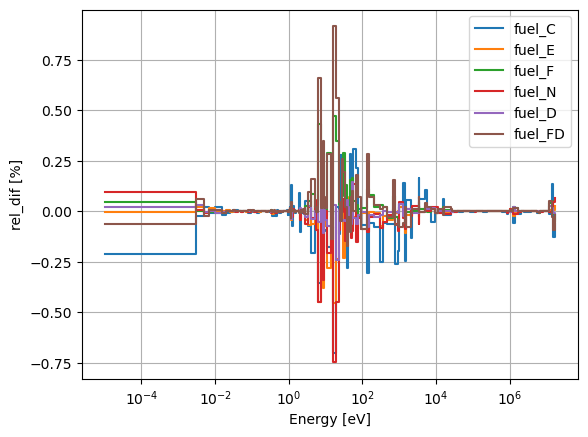

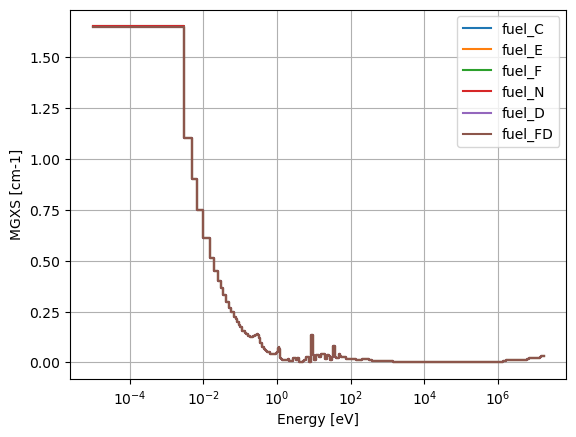

In [33]:
choose_group=openmc.mgxs.GROUP_STRUCTURES['XMAS-172']
name_group='XMAS172'

mgxs1 =mgxs_value('fuel_C','fission',lib_plot_6)
mgxs2 =mgxs_value('fuel_E','fission',lib_plot_6)
mgxs3 =mgxs_value('fuel_F','fission',lib_plot_6)
mgxs4 =mgxs_value('fuel_N','fission',lib_plot_6)
mgxs5 =mgxs_value('fuel_D','fission',lib_plot_6)
mgxs6 =mgxs_value('fuel_FD','fission',lib_plot_6)
mgxs7 =mgxs_value('fuel_pincell','fission',lib_plot_1)


def mgxs_rd(mgxs,mgxs_ref):
    mgxs_diff=[]
    for i in range(len(mgxs_ref)):
        mgxs_diff.append(100*(mgxs[i] - mgxs_ref[i]) / mgxs_ref[i])
    return(mgxs_diff)


fig, ax = plt.subplots()
ax.step(choose_group[:-1], np.flip(mgxs_rd(mgxs1,mgxs7)), where='post', label='fuel_C') 
ax.step(choose_group[:-1], np.flip(mgxs_rd(mgxs2,mgxs7)), where='post', label='fuel_E')
ax.step(choose_group[:-1], np.flip(mgxs_rd(mgxs3,mgxs7)), where='post', label='fuel_F')
ax.step(choose_group[:-1], np.flip(mgxs_rd(mgxs4,mgxs7)), where='post', label='fuel_N')
ax.step(choose_group[:-1], np.flip(mgxs_rd(mgxs5,mgxs7)), where='post', label='fuel_D')
ax.step(choose_group[:-1], np.flip(mgxs_rd(mgxs6,mgxs7)), where='post', label='fuel_FD')
# ax.step(choose_group[:-1], np.flip(mgxs8), where='post', label='fuel')

ax.set_xscale('log')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('rel_dif [%]')
ax.grid() 
ax.legend()
plt.show()




fig, ax = plt.subplots()
ax.step(choose_group[:-1], np.flip(mgxs1), where='post', label='fuel_C') 
ax.step(choose_group[:-1], np.flip(mgxs2), where='post', label='fuel_E')
ax.step(choose_group[:-1], np.flip(mgxs3), where='post', label='fuel_F')
ax.step(choose_group[:-1], np.flip(mgxs4), where='post', label='fuel_N')
ax.step(choose_group[:-1], np.flip(mgxs5), where='post', label='fuel_D')
ax.step(choose_group[:-1], np.flip(mgxs6), where='post', label='fuel_FD')
# ax.step(choose_group[:-1], np.flip(mgxs8), where='post', label='fuel_pincell_1_family')

ax.set_xscale('log')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('MGXS [cm-1]')
ax.grid() 
# bbox = ax.get_position()
# ax.text(bbox.x1 - 0.05, bbox.y0 - 0.05, reaction_plot, fontsize=15, color='red', ha='right')
ax.legend()
plt.show()